In [3]:
import numpy as np
a = np.array([1,2,3,4,5])
p = np.percentile(a, 7) # return 50th percentile, e.g median.
print(p)

4.0


In [5]:
import pandas as pd
a = pd.DataFrame(columns=["f1-score", "model"])
a.loc[1] = {"f1-score":12, "model":["2", "3"]}

In [6]:
a

,f1-score,model
1,12,"[2, 3]"


In [8]:
folds = np.random.choice(10, size = 15, replace = True)

In [11]:
folds

array([2, 6, 6, 2, 2, 7, 7, 3, 3, 8, 9, 7, 1, 3, 8])

In [92]:
#import statements
import os
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

# Some libraries for PCA visualization
import seaborn as sns 
#Make Plotly figure
import chart_studio.plotly as py
# Be aware, plotly may be installed using pip on your shell:
# conda install -c plotly chart-studio
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

from tqdm import tqdm
import random


In [77]:
data_dir = os.path.join(".")
dataset = fetch_lfw_people(data_dir)

In [4]:
dataset

{'data': array([[ 34.      ,  29.333334,  22.333334, ...,  14.666667,  16.      ,
          14.      ],
        [158.      , 160.66667 , 169.66667 , ..., 138.66667 , 135.33333 ,
         130.33333 ],
        [ 77.      ,  81.333336,  88.      , ..., 192.      , 145.33333 ,
          66.333336],
        ...,
        [ 38.      ,  41.666668,  55.333332, ...,  66.      ,  63.666668,
          54.333332],
        [ 16.666666,  24.333334,  60.333332, ..., 219.      , 143.33333 ,
          69.333336],
        [ 58.333332,  48.      ,  20.      , ..., 116.      , 106.333336,
         143.33333 ]], dtype=float32),
 'images': array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
           25.666666,  30.666666],
         [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
           26.666666,  32.      ],
         [ 33.333332,  32.333332,  40.333332, ...,  23.666666,
           28.      ,  35.666668],
         ...,
         [166.      ,  97.      ,  44.333332, ...,   9.666667,
     

In [5]:
# target = dataset["target"]
# data = dataset["data"]

In [10]:
target

5749

In [11]:
data_df = pd.DataFrame(data)
data_df["target"] = target

In [18]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,target
0,34.000000,29.333334,22.333334,22.000000,25.666666,29.000000,38.666668,68.333336,96.333336,116.666664,...,17.333334,11.000000,8.000000,4.333333,5.666667,11.333333,14.666667,16.000000,14.000000,5360
1,158.000000,160.666672,169.666672,168.333328,162.666672,161.000000,158.333328,162.666672,163.000000,159.000000,...,198.666672,169.000000,122.000000,106.333336,117.666664,133.000000,138.666672,135.333328,130.333328,3434
2,77.000000,81.333336,88.000000,108.666664,136.000000,151.333328,155.000000,164.666672,168.000000,172.000000,...,190.666672,219.333328,227.000000,218.666672,210.666672,202.000000,192.000000,145.333328,66.333336,3807
3,11.333333,11.333333,11.666667,12.666667,13.666667,15.000000,15.000000,13.000000,13.000000,14.000000,...,123.333336,124.000000,121.000000,118.333336,120.666664,123.000000,118.000000,106.333336,92.333336,26
4,32.333332,31.333334,31.333334,33.666668,33.000000,32.333332,36.333332,43.333332,43.000000,36.000000,...,11.000000,9.000000,12.666667,18.000000,17.666666,17.000000,17.000000,19.666666,22.666666,3957


In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Columns: 2915 entries, 0 to target
dtypes: float32(2914), int64(1)
memory usage: 147.2 MB


In [20]:
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,target
count,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,...,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000
mean,73.645020,76.609215,82.047195,89.338463,97.436172,105.404922,113.072159,120.380386,127.049438,132.753311,...,104.268295,107.929878,110.543449,111.502693,110.941605,109.213936,106.370956,102.723381,99.468056,2828.316633
std,50.931728,50.792950,51.222122,52.013630,52.721523,53.071274,52.734890,51.895874,50.904091,49.955223,...,57.433582,60.781528,63.713291,66.012367,67.794731,69.071571,69.742950,70.060181,70.599075,1642.550612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,35.666668,40.000000,46.666668,54.666668,63.000000,73.000000,83.333336,92.000000,100.333336,...,61.333332,61.000000,60.000000,57.666668,54.000000,49.333332,45.000000,40.666668,37.333332,1507.000000
50%,62.666668,67.000000,74.666664,84.666664,96.000000,106.000000,115.000000,124.000000,131.333328,137.666672,...,99.333336,102.333336,104.666664,105.666664,105.000000,102.000000,97.666664,92.000000,86.333336,2688.000000
75%,105.666664,109.000000,116.666664,125.666664,135.000000,144.000000,151.333328,158.333328,163.333328,168.333328,...,140.000000,147.333328,153.666672,156.666672,159.333328,159.666672,157.333328,153.666672,151.000000,4243.000000
max,254.000000,254.666672,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,254.666672,254.333328,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,5748.000000


### Nombre d'instances par classe

In [32]:
# Nombre d'instances par classe
instances_per_class = Counter(data_df["target"])

In [54]:
instances_per_class_sr = pd.Series(instances_per_class).sort_index()

In [59]:
print(instances_per_class_sr.describe())

count    5749.000000
mean        2.301792
std         9.016410
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       530.000000
dtype: float64


In [45]:
max(set(instances_per_class))

5748

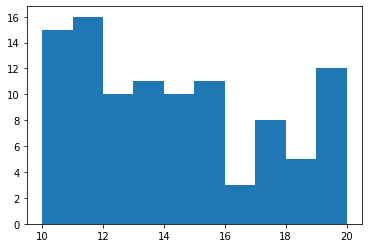

In [46]:
plt.hist(data_df["target"].value_counts(), range=(10, 20))
plt.show()

### Missing values

In [30]:
# Valeurs manquantes
print(f"Total de valeurs manquantes: {data_df.isnull().sum().sum()}")

Total null values: 0


In [80]:
X = data_df.drop("target", axis=1)
y = data_df["target"]
print(X.shape, y.shape)

(13233, 2914) (13233,)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X[:100], y[:100], test_size=0.2, random_state=42)

In [95]:
scaler = StandardScaler()
# We scale the training instances.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [114]:
def accuracy(y_true, y_pred):
    return sum(y_pred==y_true) / len(y_true)

In [117]:
y_pred_train = lin_clf.predict(X_train_scaled)
print("F1 Score training set: {}".format(f1_score(y_train, y_pred_train, average='micro')))
print("Accuracy training set: {}".format(accuracy(y_train, y_pred_train)))

y_pred_test = lin_clf.predict(X_test_scaled)
print("F1 Score testing set: {}".format(f1_score(y_test, y_pred_test, average='micro')))
print("Accuracy testing set: {}".format(accuracy(y_test, y_pred_test)))

F1 Score training set: 1.0
Accuracy training set: 1.0
F1 Score testing set: 0.0
Accuracy testing set: 0.0


In [110]:
min_faces_per_person = 20
data_m_df = fetch_lfw_people(data_dir, min_faces_per_person=min_faces_per_person)

In [109]:
len(data_m_df.data)

766

In [118]:

def provide_dataset(min_faces_per_person=0, size_factor=None):
    dataset = fetch_lfw_people(data_dir, return_X_y=True, min_faces_per_person=min_faces_per_person)
    if size_factor:
        data_size = int(f * len(dataset[0]))
        bool_mask = [True] * data_size + [False] * (len(dataset[0]) - data_size)
        random.shuffle(bool_mask)
        dataset = (dataset[0][bool_mask], dataset[1][bool_mask])
        
    data_df = pd.DataFrame(dataset[0])
    data_df["target"] = dataset[1]
    
    X = data_df.drop("target", axis=1)
    y = data_df["target"]
    return X, y

In [ ]:
def fit_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[:100], y[:100], test_size=0.2, random_state=42)
    scaler = StandardScaler()
    # We scale the training instances.
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # training 
    lin_clf = LinearSVC(random_state=42)
    lin_clf.fit(X_train_scaled, y_train)

    y_pred_train = lin_clf.predict(X_train_scaled)
    y_pred_test = lin_clf.predict(X_test_scaled)
    acc_ =  accuracy(y_train, y_pred_train), accuracy(y_test, y_pred_test)
    f1_score_ = f1_score(y_train, y_pred_train, average='micro'), f1_score(y_test, y_pred_test, average='micro')
    
    return acc_ , f1_score_

In [ ]:
min_faces_per_person_values = np.linspace(20, 200, 10)
def mfpp_influence():
    accuracies = []
    f1_scores = []
    for m in min_faces_per_person_values:
        X, y = provide_dataset(m)
        acc_, f1_score_ = fit_evaluate(X, y)
        accuracies.append(acc_)
        f1_scores.append(f1_score_)
    return accuracies, f1_scores
        

In [120]:
# fix mfpp play with dataset size
min_faces_per_person = 100
dataset_size_factors = np.linspace(0.1, 1, 5)

def dataset_size_influence():
    accuracies = []
    f1_scores = []
    for f in dataset_size_factors:
        X, y = provide_dataset(size_factor=f)
        acc_, f1_score_ = fit_evaluate(X, y)
        accuracies.append(acc_)
        f1_scores.append(f1_score_)
    return accuracies, f1_scores

In [ ]:
random.seed(1)
dataset_size_influence()

Exo 3

In [124]:
import time

In [125]:
start_time = time.time()
for k in range(3):
    a =4

end_time = time.time()
end_time - start_time

9.894371032714844e-05

In [141]:
a = 2
def d(a):
    assert a == None or (a <= 1 and a>=0)
    print("hi")

In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
??fetch_lfw_people

False